# 🎮 Análisis Exploratorio de Ventas de Videojuegos

Este proyecto realiza un análisis exploratorio de un conjunto de datos con información sobre ventas globales de videojuegos. El objetivo es identificar patrones y tendencias clave que puedan resultar útiles para comprender el comportamiento del mercado en distintas plataformas, géneros, regiones y periodos de tiempo.

### 🔍 Objetivos del análisis:

- Identificar los **géneros más vendidos** a nivel mundial.
- Analizar qué **plataformas** han tenido mayor éxito en ventas.
- Evaluar el desempeño de los principales **publishers**.
- Comparar **preferencias regionales** entre Japón y Europa.
- Observar la **evolución temporal** de las ventas de videojuegos.

Este trabajo se ha realizado con Python y pandas, utilizando visualizaciones con seaborn y matplotlib para facilitar la interpretación de los datos.




### 1. Importaciones

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Configuración gráfica
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

### 2. Carga de Dataset

In [21]:
df = pd.read_csv('data/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### 3. Exploración inicial

In [22]:
df.info() # info general del dataframe
df.describe() # Estadísticas descriptivas básicas
df.isnull().sum() # Revisar valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

### 4. Limpieza

In [23]:
# Eliminar filas con valores nulos (YEAR)
df = df.dropna(subset=['Year'])

# Sustituir valores nunlos (Publisher) por Unknown
df['Publisher'] = df['Publisher'].fillna('Unknown')

# Comprobar valores nulos
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

### 5. Análisis exploratorio
    1. ¿Qué géneros han vendido más globalmente?

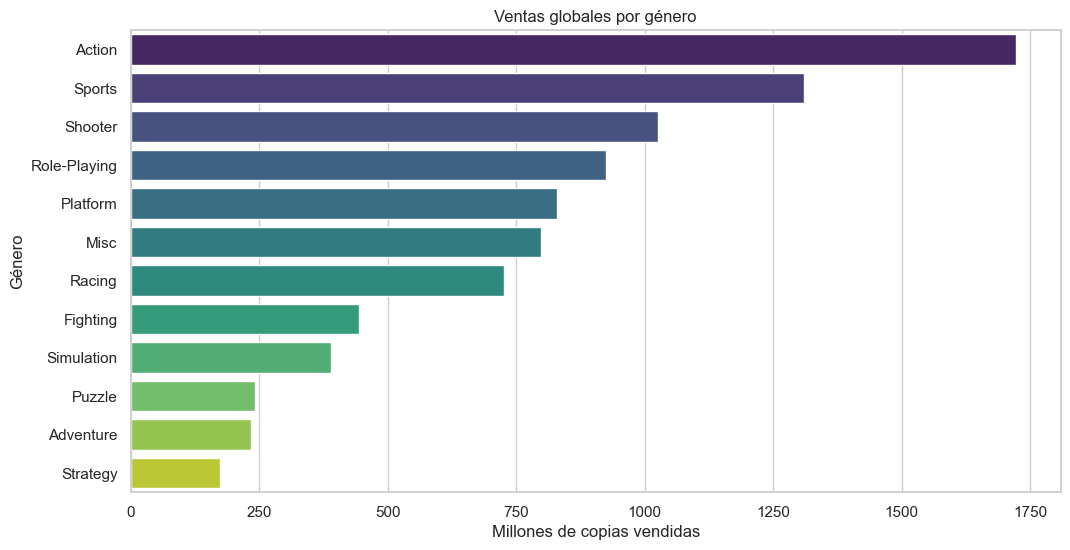

In [24]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Visualización
sns.barplot(x=genre_sales.values, y=genre_sales.index, palette='viridis')
plt.title('Ventas globales por género')
plt.xlabel('Millones de copias vendidas')
plt.ylabel('Género')
plt.show()

    2. ¿Qué plataformas han vendido más globalmente?

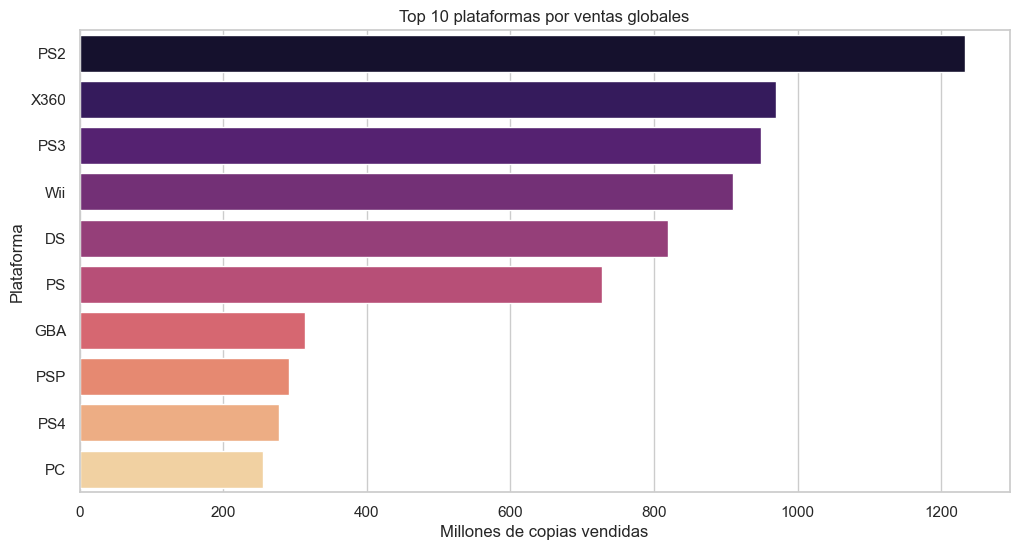

In [25]:
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)

# Visualización
sns.barplot(x=platform_sales.values, y=platform_sales.index, palette='magma')
plt.title('Top 10 plataformas por ventas globales')
plt.xlabel('Millones de copias vendidas')
plt.ylabel('Plataforma')
plt.show()

    3. ¿Qué compañías (publishers) han vendido más globalmente?

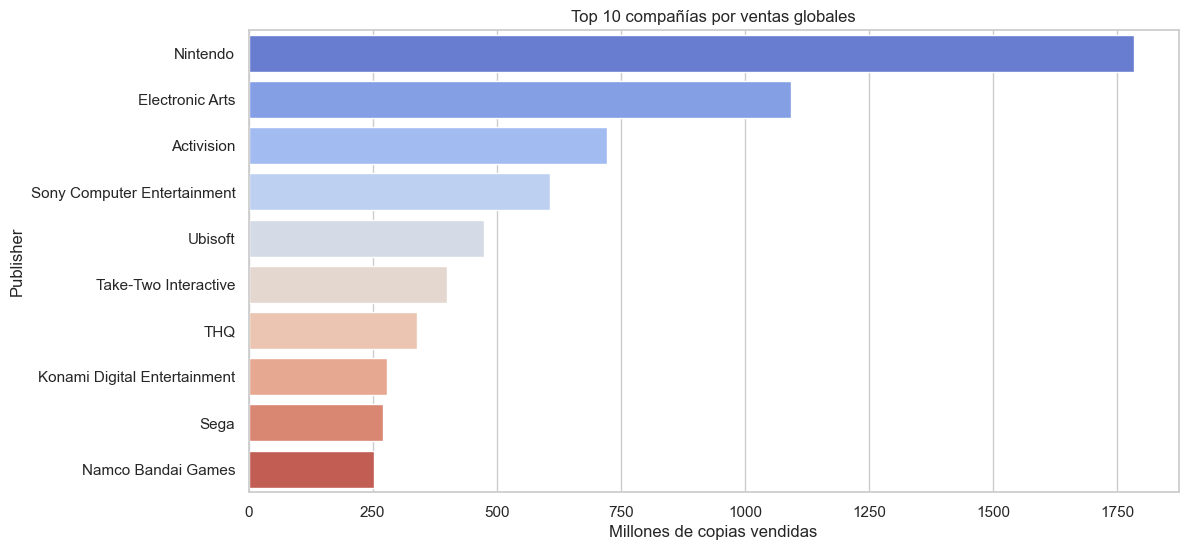

In [26]:
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=publisher_sales.values, y=publisher_sales.index, palette='coolwarm')
plt.title('Top 10 compañías por ventas globales')
plt.xlabel('Millones de copias vendidas')
plt.ylabel('Publisher')
plt.show()

    4. ¿Qué tipo de juegos funciona mejor en Japón que en Europa?

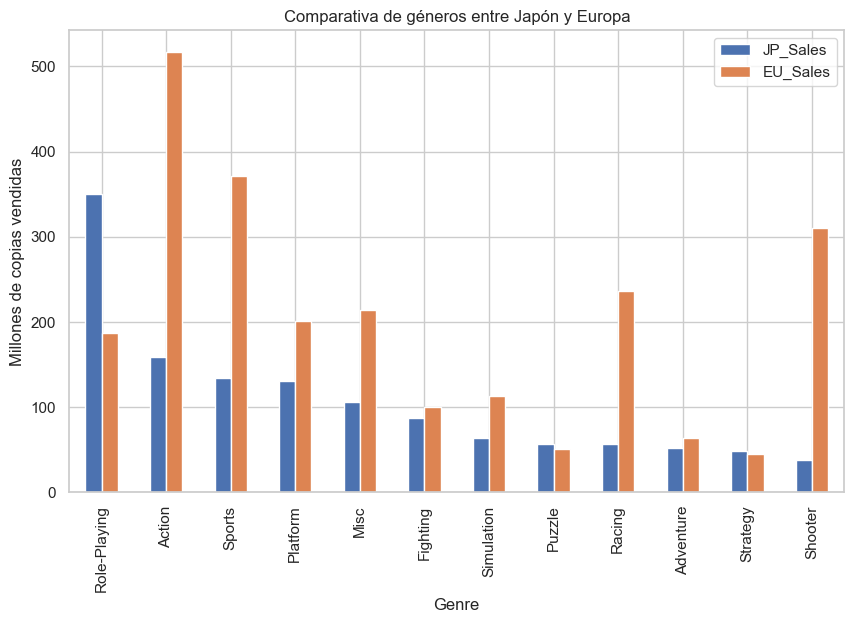

In [27]:
genre_region = df.groupby('Genre')[['JP_Sales', 'EU_Sales']].sum().sort_values(by='JP_Sales', ascending=False)
genre_region.plot(kind='bar', figsize=(10,6))
plt.title('Comparativa de géneros entre Japón y Europa')
plt.ylabel('Millones de copias vendidas')
plt.show()

    5. Evolución de ventas por año.

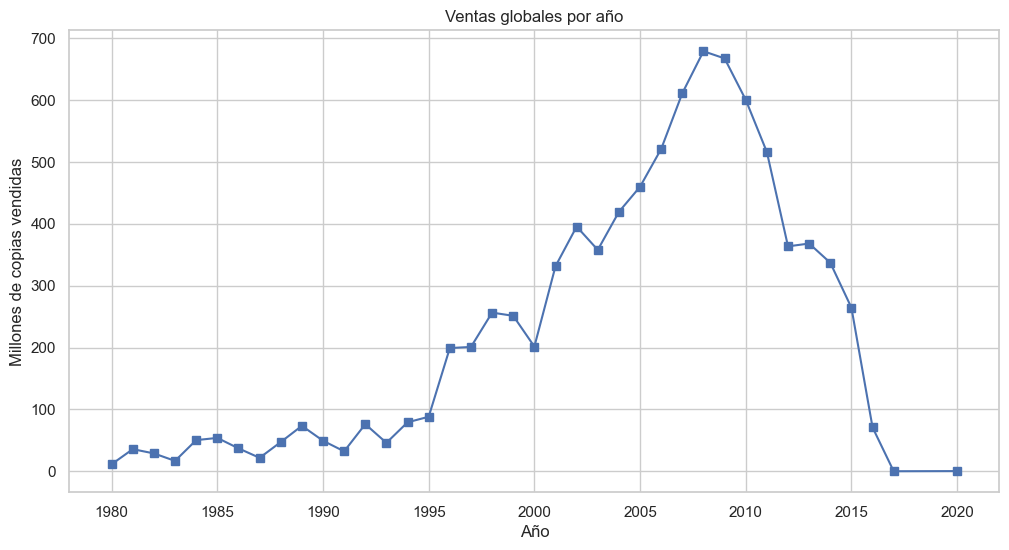

In [28]:
sales_year = df.groupby('Year')['Global_Sales'].sum()
sales_year.plot(kind='line', marker='s')
plt.title('Ventas globales por año')
plt.xlabel('Año')
plt.ylabel('Millones de copias vendidas')
plt.grid(True)
plt.show()

## 📌 Conclusiones del Análisis Exploratorio

1. **Géneros más vendidos globalmente**  
   El género con mayor volumen de ventas globales es **Action**, seguido de cerca por **Sports** y **Shooter**. Esto sugiere que los juegos con dinámicas rápidas y competitivas dominan el mercado a nivel mundial.

2. **Plataformas con mayores ventas**  
   Las plataformas más exitosas en ventas son principalmente de **Nintendo** (como Wii, DS y NES), aunque también destacan otras como **PlayStation 2** y **Xbox 360**. Esto muestra la fuerte presencia histórica de Nintendo en el sector.

3. **Distribución de ventas por publisher**  
   **Nintendo** lidera ampliamente las ventas globales por editor, superando al resto con diferencia. Esto refuerza su rol dominante tanto como desarrollador como distribuidor.

4. **Preferencias por región: Japón vs. Europa**  
   - En **Japón**, el género favorito es claramente **Role-Playing (RPG)**, lo que refleja una cultura de juego diferente, más enfocada en historias y mecánicas complejas.  
   - En **Europa**, los géneros más vendidos son **Sports** y **Action**, en línea con una preferencia por juegos más dinámicos y accesibles.

5. **Tendencia de ventas por año**  
   Las ventas globales de videojuegos alcanzaron su pico entre **2006 y 2009**, coincidiendo con el éxito de consolas como Wii, DS y PS3. A partir de ahí, se observa una tendencia descendente, posiblemente por cambios en el modelo de negocio (más digital, menos físico).
